11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Original training data shape: (60000, 28, 28)
Original testing data shape: (10000, 28, 28)

Flattened training data shape: (60000, 784)
Flattened noisy training data shape: (60000, 784)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       201,488 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 484,944 (1.85 MB)

 Trainable params: 484,944 (1.85 MB)

 Non-trainable params: 0 (0.00 B)


--- Training the Autoencoder ---
Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 0.0827 - val_loss: 0.0326
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0297 - val_loss: 0.0238
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0231 - val_loss: 0.0206
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.0205 - val_loss: 0.0189
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0186 - val_loss: 0.0177
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0175 - val_loss: 0.0167
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0166 - val_loss: 0.0162
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0160 - val_loss: 0.0155
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.0154 - val_loss: 0.0153
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0150 - val_loss: 0.0149
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0145 - val_loss: 0.0144
Epoch 

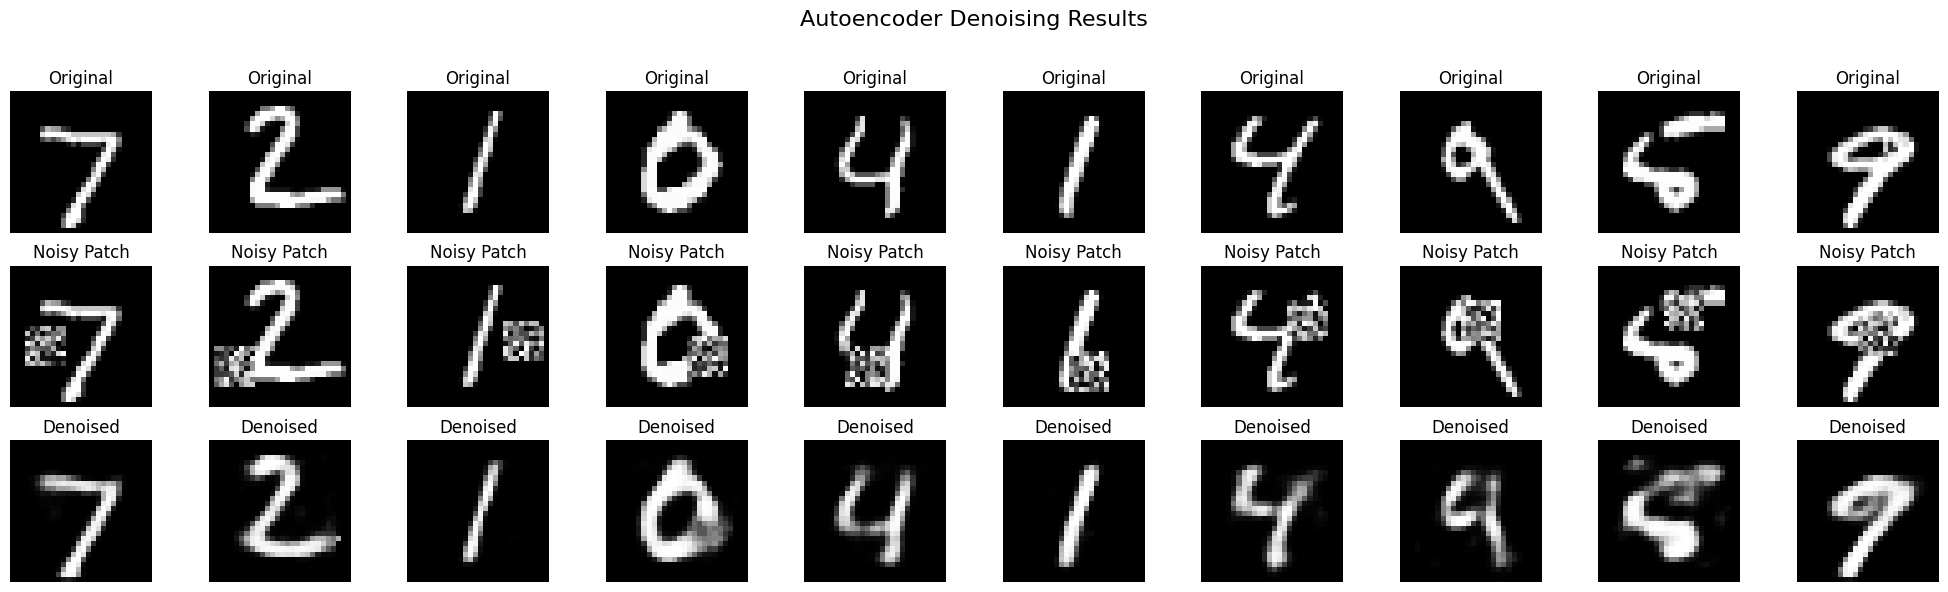

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import random

def add_patch_noise(images, patch_size=8):
    """
    Adds a random 8x8 patch of noise to a batch of images.

    Args:
        images (np.array): A numpy array of images (e.g., (num_samples, 28, 28)).
        patch_size (int): The size of the square noise patch.

    Returns:
        np.array: The images with the added noise patch.
    """
    noisy_images = np.copy(images)
    num_images, height, width = images.shape

    for i in range(num_images):
        # Randomly select the top-left corner of the patch
        # Ensure the patch does not go out of bounds
        x_start = random.randint(0, width - patch_size)
        y_start = random.randint(0, height - patch_size)

        # Generate random noise for the patch
        noise = np.random.rand(patch_size, patch_size)

        # Apply the noise patch to the image
        noisy_images[i, y_start:y_start+patch_size, x_start:x_start+patch_size] = noise

    return noisy_images

def main():
    # 1. Load and Preprocess the MNIST Dataset
    (x_train, _), (x_test, _) = mnist.load_data()

    # Normalize images to the range [0, 1]
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.

    print(f"Original training data shape: {x_train.shape}")
    print(f"Original testing data shape: {x_test.shape}")

    # 2. Add Patch-Based Noise
    x_train_noisy = add_patch_noise(x_train)
    x_test_noisy = add_patch_noise(x_test)

    # 3. Flatten the images for the MLP
    # The MLP expects a 1D vector as input.
    x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
    x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
    x_train_noisy = x_train_noisy.reshape((len(x_train_noisy), np.prod(x_train_noisy.shape[1:])))
    x_test_noisy = x_test_noisy.reshape((len(x_test_noisy), np.prod(x_test_noisy.shape[1:])))

    print(f"\nFlattened training data shape: {x_train.shape}")
    print(f"Flattened noisy training data shape: {x_train_noisy.shape}")

    # 4. Build the MLP Denoising Autoencoder Model
    input_dim = 784  # 28 * 28
    encoding_dim = 64  # Size of the compressed representation

    # --- Encoder ---
    # Takes the noisy image as input
    input_img = Input(shape=(input_dim,))
    # Compresses the input into a smaller latent representation
    encoded = Dense(256, activation='relu')(input_img)
    encoded = Dense(128, activation='relu')(encoded)
    encoded = Dense(encoding_dim, activation='relu')(encoded) # Bottleneck layer

    # --- Decoder ---
    # Takes the latent representation as input
    # Reconstructs the image from the latent representation
    decoded = Dense(128, activation='relu')(encoded)
    decoded = Dense(256, activation='relu')(decoded)
    # The final layer uses a sigmoid activation to output pixel values between 0 and 1
    decoded = Dense(input_dim, activation='sigmoid')(decoded)

    # --- Autoencoder Model ---
    # This model maps an input (noisy image) to its reconstruction (denoised image)
    autoencoder = Model(input_img, decoded)

    # 5. Compile the Model
    # We use mean squared error as the loss function to compare the
    # reconstructed image with the original clean image.
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')
    autoencoder.summary()

    # 6. Train the Model
    print("\n--- Training the Autoencoder ---")
    history = autoencoder.fit(
        x_train_noisy,          # Input: Noisy images
        x_train,                # Target: Clean original images
        epochs=20,
        batch_size=256,
        shuffle=True,
        validation_data=(x_test_noisy, x_test) # Validation on the test set
    )
    print("--- Training Complete ---")


    # 7. Visualize the Results
    # Predict (denoise) the noisy test images
    denoised_images = autoencoder.predict(x_test_noisy)

    # Display a few examples
    n = 10  # Number of digits to display
    plt.figure(figsize=(20, 6))
    for i in range(n):
        # Display original clean image
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis("off")

        # Display noisy image
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
        plt.title("Noisy Patch")
        plt.axis("off")

        # Display denoised (reconstructed) image
        ax = plt.subplot(3, n, i + 1 + 2 * n)
        plt.imshow(denoised_images[i].reshape(28, 28), cmap='gray')
        plt.title("Denoised")
        plt.axis("off")

    plt.suptitle("Autoencoder Denoising Results", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

if __name__ == '__main__':
    main()